In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import random
from matplotlib.offsetbox import AnchoredText

In [2]:
#!jt -t onedork -> dark mode, r monokai
#!jt -t

In [3]:
# 18 total columns
df = pd.read_csv("all_in_one_kanji.csv",index_col=False,header = None,
                 names = ["Kanji","Onyomi","Kunyomi","Nanori","English","Examples",
                         "JLPT Level","Jouyou Grade","Frequency","Components",
                         "Number of Strokes","Kanji Radical","Radical Number",
                          "Radical Strokes","Radical Reading",
                         "Traditional Form","Classification","Keyword","Koohii Story 1",
                         "Koohii Story 2"])

In [4]:
for n, col in enumerate(df.columns):
    print("{}:{}".format(n,col))

0:Kanji
1:Onyomi
2:Kunyomi
3:Nanori
4:English
5:Examples
6:JLPT Level
7:Jouyou Grade
8:Frequency
9:Components
10:Number of Strokes
11:Kanji Radical
12:Radical Number
13:Radical Strokes
14:Radical Reading
15:Traditional Form
16:Classification
17:Keyword
18:Koohii Story 1
19:Koohii Story 2


In [5]:
# for use in other projects
#df.to_csv("anki_kanji_df.csv")

In [6]:
df.head(2)

,Kanji,Onyomi,Kunyomi,Nanori,English,Examples,JLPT Level,Jouyou Grade,Frequency,Components,Number of Strokes,Kanji Radical,Radical Number,Radical Strokes,Radical Reading,Traditional Form,Classification,Keyword,Koohii Story 1,Koohii Story 2
0,一,イチ、イツ,ひと-、ひと.つ,"かず, い, いっ, いる, かつ, かづ, てん, はじめ, ひ, ひとつ, まこと",one,"""一人(ひとり): (1) one person (2) alone; unmarried;...",5,1,2.0,"一: one, one radical (no. 1)",1.0,一,1.0,1.0,いち,(none),指事 Ideographic,one,"One down, 2041 to go. ;).","""To learn this one kanji, I recommend (#2000) ..."
1,二,ニ、ジ,ふた、ふた.つ、ふたたび,"おと, つぐ, にい, は, ふ, ふたつ, ふだ, わ",two,二(に): two<br>二人(ふたり): two persons; two people;...,5,1,9.0,"二: two, two radical (no. 7)",2.0,二,7.0,2.0,に・ふた,(none),指事 Ideographic,two,Two lines.,"Roman numeral II, written on its side."


In [7]:
df_slim = df[["Kanji","Onyomi","Kunyomi"]].copy()

In [8]:
df_slim.tail()

,Kanji,Onyomi,Kunyomi
3782,鮠,NaN,NaN
3783,鯊,NaN,NaN
3784,鯰,NaN,NaN
3785,鰌,NaN,NaN
3786,鮃,NaN,NaN


In [9]:
df_slim.shape

(3787, 3)

In [10]:
df_slim.dropna(inplace=True)

In [11]:
df_slim.shape

(2406, 3)

In [12]:
freq_df = pd.read_csv("freq_list.csv")

In [13]:
freq_df.head()

,Word,Frequency
0,の,1612852
1,に,912916
2,を,894982
3,が,437742
4,て,430296


In [14]:
K_PATTERN = r"([一-龯])"

In [15]:
test = "これは漢字のある文章です。もっと漢字を使え！"

In [16]:
re.findall(K_PATTERN,test)

['漢', '字', '文', '章', '漢', '字', '使']

In [17]:
def regex_filter(val, regex):
    if val:
        mo = re.search(regex,val)
        if mo:
            return True
        else:
            return False
    else:
        return False

In [18]:
# get the words with kanji in them
freq_filtered = freq_df[freq_df["Word"].apply(regex_filter,regex=K_PATTERN)]

In [19]:
freq_filtered.head()

,Word,Frequency
13,ローマ字,158036
21,人,99713
22,名,96459
34,的,55390
35,二,54078


In [20]:
def only_kanji(text):
    return "".join(re.findall(K_PATTERN,text))

In [21]:
kanji_df = freq_filtered.copy()

In [22]:
kanji_df["Word"] = kanji_df["Word"].apply(only_kanji)

In [23]:
kanji_df

,Word,Frequency
13,字,158036
21,人,99713
22,名,96459
34,的,55390
35,二,54078
...,...,...
257166,玉,1
257167,亟端,1
257169,一体春風馬堤曲採蓮,1
257172,蹐地,1


In [24]:
# number of words found with that char
kanji_df["Word"].str.count("字").sum()

248

In [25]:
#get a list of all kanji from that freq_df
k_list = []
for i in kanji_df["Word"]:
    res = re.findall(K_PATTERN,i)
    if len(res) > 0:
        k_list +=res

In [26]:
k_set = set(k_list)

In [27]:
len(k_list)

276155

In [28]:
len(k_set)

6620

In [29]:
kanji_df.head(3)

,Word,Frequency
13,字,158036
21,人,99713
22,名,96459


In [30]:
freq_df.head(3)

,Word,Frequency
0,の,1612852
1,に,912916
2,を,894982


In [31]:
freq_df[freq_df["Word"] == "字"]

,Word,Frequency
244,字,9962


In [32]:
freq_df[freq_df["Word"].str.contains("遺伝")]

,Word,Frequency
3043,遺伝,1066
3451,遺伝子,924


In [33]:
freq_df[freq_df["Word"].str.contains('遺伝')].sum()["Frequency"]
#gets the sum of the strings that contain the char
#sums each column

1990

In [34]:
# from here, I will just use the csv titled 'k_freq.csv'.
# the above code was to show the method I went about making 'k_freq.csv'
# can find the code in https://github.com/LexingtonWhalen/KanjiStrokesAnalysis/blob/main/analysis.ipynb
# also watch the video provided if confused

In [35]:
k_freq_df = pd.read_csv("k_freq.csv")

In [36]:
k_freq_df.sort_values(by="Frequency",ascending=False,inplace=True)

In [37]:
# for future convenience
#k_freq_df.to_csv("k_freq_descending.csv")

In [38]:
k_freq_df.head(2)

,Kanji,Frequency
3052,人,207991
4927,字,202950


In [39]:
df_slim.head(2)

,Kanji,Onyomi,Kunyomi
0,一,イチ、イツ,ひと-、ひと.つ
1,二,ニ、ジ,ふた、ふた.つ、ふたたび


In [40]:
# merge for the frequency data
merged = df_slim.merge(k_freq_df,left_on="Kanji",right_on="Kanji")

In [41]:
merged.head(3)

,Kanji,Onyomi,Kunyomi,Frequency
0,一,イチ、イツ,ひと-、ひと.つ,104644
1,二,ニ、ジ,ふた、ふた.つ、ふたたび,73435
2,三,サン、ゾウ,み、み.つ、みっ.つ,60231


In [42]:
# testing to see if correct
merged[merged["Kanji"]=="字"]

,Kanji,Onyomi,Kunyomi,Frequency
59,字,ジ,あざ、あざな、-な,202950


In [43]:
merged.sort_values(by="Frequency",ascending=False,inplace=True)

In [44]:
merged.head(3)

,Kanji,Onyomi,Kunyomi,Frequency
36,人,ジン、ニン,ひと、-り、-と,207991
59,字,ジ,あざ、あざな、-な,202950
330,物,ブツ、モツ,もの、もの-,184556


In [45]:
# now get the onyomi and kunyomi separately
merged["Onyomi"][0].split(",")

['イチ、イツ']

In [46]:
def get_list_and_set(column,delim):
    l = []
    for i in column:
        l += i.split("{}".format(delim))
    return l, set(l)

In [47]:
# note we are splitting on "、" not "," -> the commas are different!
onyomi_list,onyomi_set  = get_list_and_set(merged["Onyomi"],"、")
kunyomi_list,kunyomi_set  = get_list_and_set(merged["Kunyomi"],"、")

In [48]:
print("Onyomi List len: {}, set len: {}".format(len(onyomi_list),len(onyomi_set)))
print("Kunyomi List len: {}, set len: {}".format(len(kunyomi_list),len(kunyomi_set)))

Onyomi List len: 3052, set len: 352
Kunyomi List len: 4518, set len: 3219


In [49]:
merged.head(3)

,Kanji,Onyomi,Kunyomi,Frequency
36,人,ジン、ニン,ひと、-り、-と,207991
59,字,ジ,あざ、あざな、-な,202950
330,物,ブツ、モツ,もの、もの-,184556


In [50]:
def search_sound(sound,readingType):
    count = 0
    for n, i in enumerate(merged[readingType]):
        if(sound in i.split("、")):
            kanji = merged.iloc[n]["Kanji"]
            frequency = merged.iloc[n]["Frequency"]
            #print("{}: {}".format(kanji,frequency))
            count += int(frequency)
            
            
    return count

In [51]:
print(search_sound("ベン",readingType="Onyomi"))

61545


In [52]:
onyomi_d = {"Reading":[],"Frequency":[]}
for i in onyomi_set:
    onyomi_d["Reading"].append(i)
    onyomi_d["Frequency"].append(search_sound(i,readingType="Onyomi"))

In [53]:
onyomi_df = pd.DataFrame(onyomi_d)

In [54]:
onyomi_df.sort_values(by="Frequency",ascending=False,inplace=True)

In [55]:
#onyomi_df

In [56]:
# now do the same with kunyomi
kunyomi_d = {"Reading":[],"Frequency":[]}
for i in kunyomi_set:
    kunyomi_d["Reading"].append(i)
    kunyomi_d["Frequency"].append(search_sound(i,readingType="Kunyomi"))

In [57]:
kunyomi_df = pd.DataFrame(kunyomi_d)

In [58]:
kunyomi_df.sort_values(by="Frequency",ascending =False,inplace = True)

In [59]:
kunyomi_df.head()

,Reading,Frequency
68,-な,351443
145,もと,276847
448,もの,267006
1708,はか.る,247561
1868,うち,237039


In [60]:
merged.head(3)

,Kanji,Onyomi,Kunyomi,Frequency
36,人,ジン、ニン,ひと、-り、-と,207991
59,字,ジ,あざ、あざな、-な,202950
330,物,ブツ、モツ,もの、もの-,184556


In [61]:
def get_most_common_kanji(sound,reading_type):
    for n, i in enumerate(merged[reading_type]):
        if(sound in i.split("、")):
            return (merged.iloc[n]["Kanji"])

In [62]:
get_most_common_kanji("ジン","Onyomi")

'人'

In [63]:
most_common_onyomi_char = []
for reading in onyomi_df["Reading"]:
    most_common_onyomi_char.append(get_most_common_kanji(reading,"Onyomi"))

In [64]:
#most_common_onyomi_char

In [65]:
onyomi_df["Most Common Kanji"] = most_common_onyomi_char

In [66]:
#onyomi_df

In [67]:
# now for the kunyomi!
most_common_kunyomi_char = []
for reading in kunyomi_df["Reading"]:
    most_common_kunyomi_char.append(get_most_common_kanji(reading,"Kunyomi"))

In [68]:
#most_common_kunyomi_char

In [69]:
kunyomi_df["Most Common Kanji"] = most_common_kunyomi_char

In [70]:
kunyomi_df.head()

,Reading,Frequency,Most Common Kanji
68,-な,351443,字
145,もと,276847,下
448,もの,267006,物
1708,はか.る,247561,画
1868,うち,237039,中


In [71]:
#surprising
merged[merged["Kanji"] == "字" ]

,Kanji,Onyomi,Kunyomi,Frequency
59,字,ジ,あざ、あざな、-な,202950


In [72]:
#getting relative freqs
onyomi_df["Frequency"].sum()

29001873

In [73]:
onyomi_df["Relative Frequency"] = (onyomi_df["Frequency"] / onyomi_df["Frequency"].sum())*100

In [74]:
kunyomi_df["Relative Frequency"] = (kunyomi_df["Frequency"] / kunyomi_df["Frequency"].sum())*100

In [75]:
onyomi_df.head()

,Reading,Frequency,Most Common Kanji,Relative Frequency
145,ショウ,845600,生,2.915674
339,ジ,697746,字,2.405865
138,シ,680068,子,2.344911
108,コウ,624635,行,2.153775
6,カ,540322,下,1.863059


In [76]:
# note I am doing the most common kanji THAT HAS THAT READING AS POSSIBLE.
# ie: 画 and 字 look strange,but follow the method. Keep this in mind!
kunyomi_df.head()

,Reading,Frequency,Most Common Kanji,Relative Frequency
68,-な,351443,字,0.662355
145,もと,276847,下,0.521766
448,もの,267006,物,0.503219
1708,はか.る,247561,画,0.466572
1868,うち,237039,中,0.446741


In [77]:
# some analysis:
onyomi_df["Frequency"].describe()

count       352.000000
mean      82391.684659
std      115006.616681
min          24.000000
25%       11088.000000
50%       41918.500000
75%      104404.250000
max      845600.000000
Name: Frequency, dtype: float64

In [78]:
# some analysis:
kunyomi_df["Frequency"].describe()

count      3219.000000
mean      16483.254427
std       29073.603301
min           3.000000
25%        1397.500000
50%        5829.000000
75%       17513.000000
max      351443.000000
Name: Frequency, dtype: float64

In [79]:
onyomi_kanji_d = {}
for n, i in enumerate(onyomi_df["Most Common Kanji"]):
    onyomi_kanji_d[onyomi_df["Relative Frequency"].iloc[n]] = i

In [80]:
kunyomi_kanji_d = {}
for n, i in enumerate(kunyomi_df["Most Common Kanji"]):
    kunyomi_kanji_d[kunyomi_df["Relative Frequency"].iloc[n]] = i

In [87]:
def make_pretty_graph(df,kanji_mapping,reading_type,bound):
    
    r = lambda:random.randint(0,255)
    my_colors = ['#%02X%02X%02X' % (r(),r(),r()) for i in range(df["Relative Frequency"].size)]

    x = df["Reading"][:bound]
    y = df["Relative Frequency"][:bound]

    fig, ax = plt.subplots(figsize=(20,10))
    rects = ax.bar(x = x,height = y,color = my_colors,width = 0.8,tick_label=x)
    ax.tick_params(labelrotation=45)
    ax.set_ylabel("Relative Frequency (%)")
    ax.set_xlabel("{} Reading".format(reading_type))
    ax.set_title("{} Reading and Relative Frequency".format(reading_type))
    plt.rc('font', family='Meiryo',size=25)

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(kanji_mapping[height]),
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 5),  # 5 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom')
    autolabel(rects)


    at = AnchoredText("Kanji above bars represent the most \n frequent Kanji of that reading.",loc="upper right")
    at.patch.set_boxstyle("square,pad=0.5")
    ax.add_artist(at)



    plt.margins(0.05, 0.2)
    #plt.savefig("{}.png".format(reading_type))

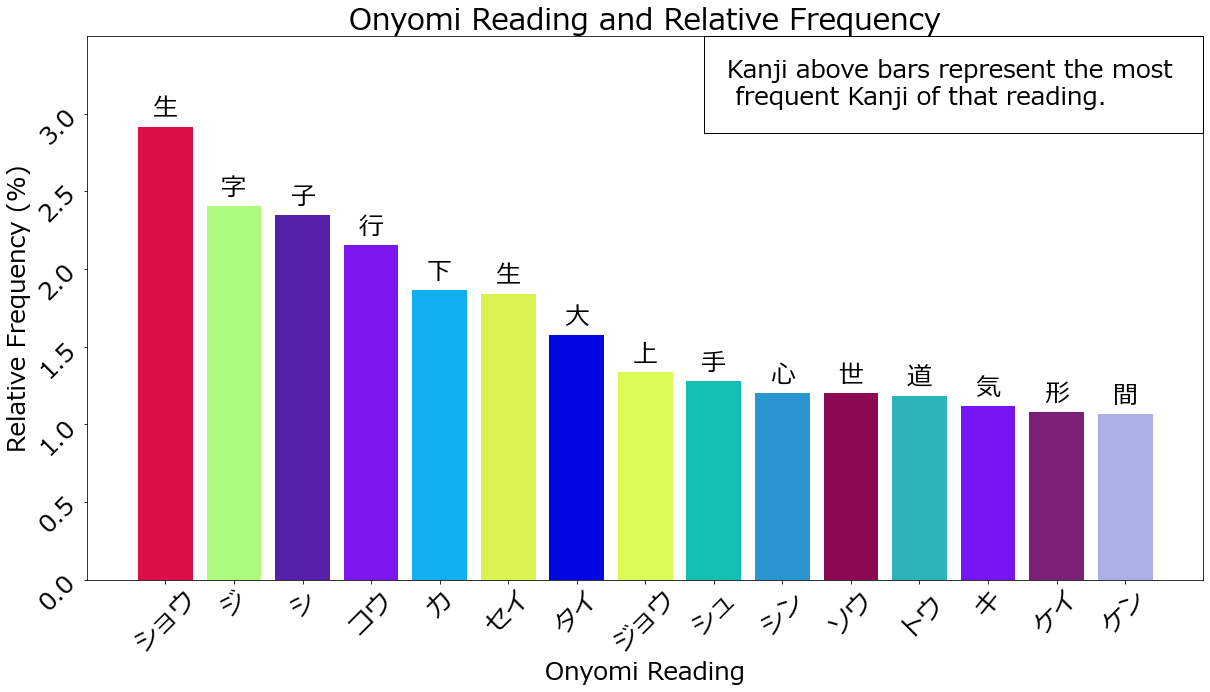

In [98]:
make_pretty_graph(onyomi_df,onyomi_kanji_d,"Onyomi",15)

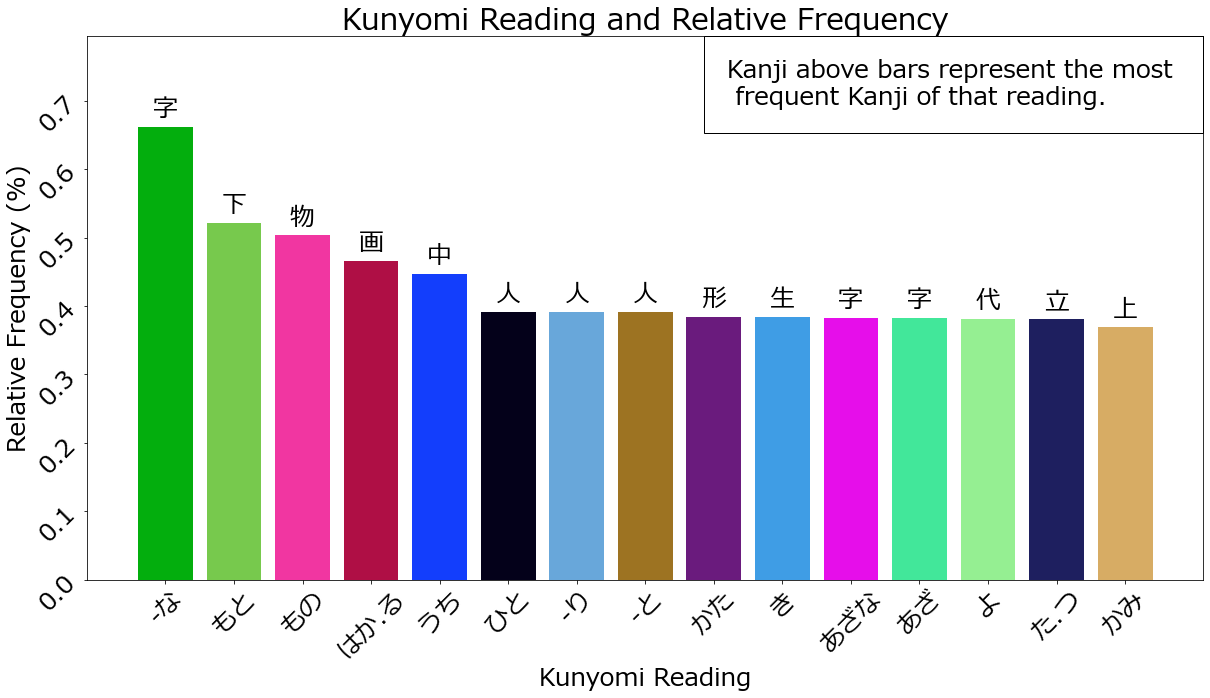

In [97]:
make_pretty_graph(kunyomi_df,kunyomi_kanji_d,"Kunyomi",15)